### What do we want?

* We want to quantify our uncertainty
* We want to also use this to generate a model
* We want the answers as distributions not point estimates

-----

Some resources:
https://vioshyvo.github.io/Bayesian_inference/index.
https://github.com/florent-leclercq/Bayes_InfoTheory/blob/master/DecisionTheory.ipynb
https://github.com/banditkings/random-python-examples/blob/main/modeling/Bayesian%20Decision%20Theory%20with%20pymc%204.ipynb
https://github.com/canyon289/PyDataGlobal_2020/blob/master/PyDataGlobal_Ravin.ipynb


MLE coin toss (https://zhiyzuo.github.io/MLE-vs-MAP/)

In [45]:
import numpy as np
import scipy as sp


In [46]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [51]:
# simulate random tosses
n = 10
theta = 0.7
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=n)
X_arr


array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [19]:
X_arr = np.ones(n)
X_arr


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [57]:
#MLE of Bernoulli - simply mean



theta = 0.7
n = 100
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=n)

################


sum(X_arr) /  X_arr.size


0.73

## Adding prior probability, 

what is our belief on the parameter?


[Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution)

In probability theory and statistics, the beta distribution is a family of continuous probability distributions defined on the interval [0, 1] or (0, 1) in terms of two positive parameters, denoted by alpha (α) and beta (β), that appear as exponents of the variable and its complement to 1, respectively, and control the shape of the distribution.

The beta distribution has been applied to model the behavior of random variables limited to intervals of finite length in a wide variety of disciplines. The beta distribution is a suitable model for the random behavior of percentages and proportions. 



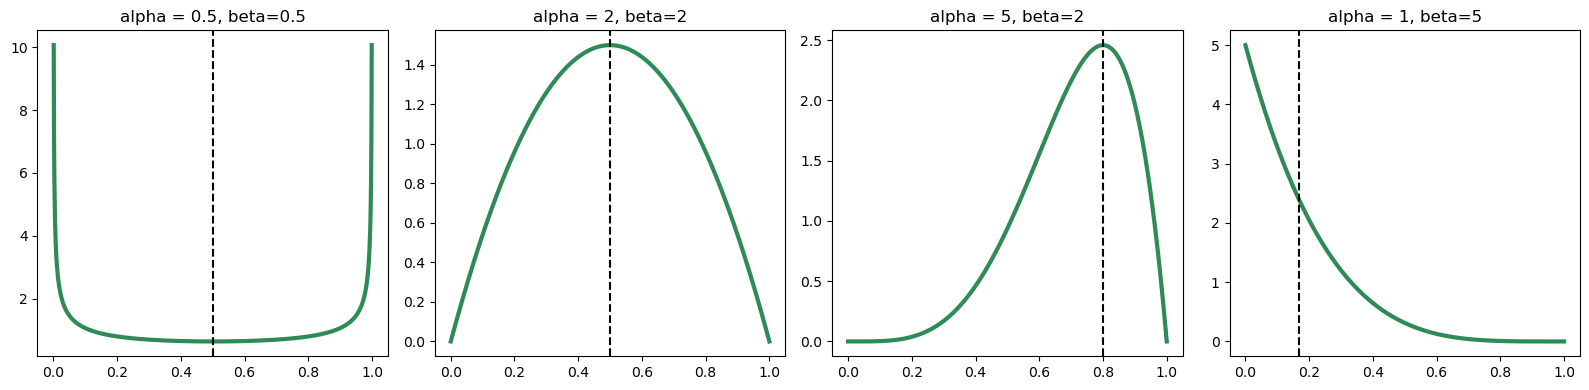

In [58]:
my_color = '#2E8B57'
beta_X = np.linspace(0, 1, 1000)

fig, ax_arr = plt.subplots(ncols=4, figsize=(16,4), sharex=True)
for i, iter_ in enumerate([[0.5,0.5], [2,2], [5,2], [1,5]]):
    ax = ax_arr[i]
    a= iter_[0]
    b= iter_[1]
    beta_Y = sp.stats.beta.pdf(x=beta_X, a=a, b=b)
    ax.plot(beta_X, beta_Y, color=my_color, linewidth=3)
    if a > 1 and b > 1:
        mode = (a-1)/(a+b-2)
    else:
        mode = a/(a+b)
    ax.axvline(x=mode, linestyle='--', color='k')
    ax.set_title(f'alpha = {a}, beta={b}')
fig.tight_layout()

[Conjugate distribution](https://en.wikipedia.org/wiki/Conjugate_prior)
In Bayesian probability theory, if the posterior distribution p ( θ ∣ x )  is in the same probability distribution family as the prior probability distribution p ( θ ) , the prior and posterior are then called conjugate distributions, and the prior is called a conjugate prior for the likelihood function p ( x ∣ θ ) . 

our posterior is updated as Beta(α+x_i,β+1−x_i) with every input data x_i.

In [59]:
X_arr.size

100

In [60]:
# thus what will be our beta distributions after each obervation:

alpha = beta = 2
beta_arr = np.asarray([[alpha+sum(X_arr[:i+1]), beta+(i+1-sum(X_arr[:i+1]))] for i in range(X_arr.size)])


In [61]:
#(https://numpy.org/doc/stable/reference/generated/numpy.insert.html)
#insert into what; to which position; what; which axis 
beta_arr = np.insert(beta_arr, 0, [alpha, beta], 0)
beta_arr

array([[ 2,  2],
       [ 2,  3],
       [ 2,  4],
       [ 3,  4],
       [ 4,  4],
       [ 5,  4],
       [ 6,  4],
       [ 7,  4],
       [ 8,  4],
       [ 8,  5],
       [ 9,  5],
       [10,  5],
       [11,  5],
       [12,  5],
       [12,  6],
       [12,  7],
       [12,  8],
       [12,  9],
       [13,  9],
       [13, 10],
       [14, 10],
       [15, 10],
       [16, 10],
       [17, 10],
       [17, 11],
       [18, 11],
       [19, 11],
       [20, 11],
       [21, 11],
       [22, 11],
       [23, 11],
       [24, 11],
       [25, 11],
       [26, 11],
       [27, 11],
       [28, 11],
       [29, 11],
       [30, 11],
       [31, 11],
       [31, 12],
       [32, 12],
       [32, 13],
       [33, 13],
       [33, 14],
       [34, 14],
       [35, 14],
       [36, 14],
       [36, 15],
       [37, 15],
       [38, 15],
       [38, 16],
       [39, 16],
       [40, 16],
       [41, 16],
       [41, 17],
       [41, 18],
       [42, 18],
       [42, 19],
       [43, 19

In [62]:
# for plotting the distribution 
beta_X = np.linspace(0, 1, 1000)

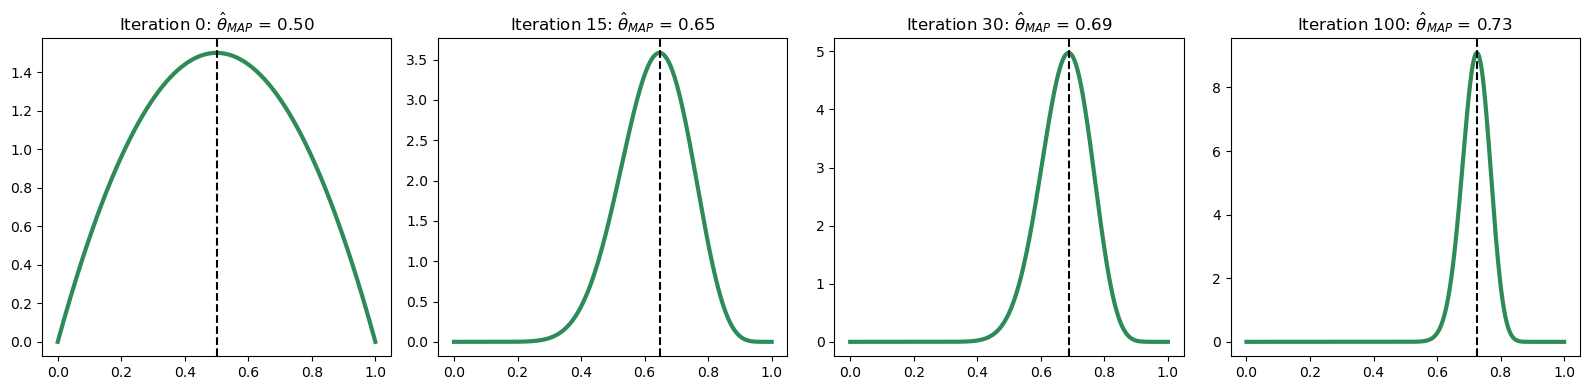

In [63]:
my_color = '#2E8B57'
fig, ax_arr = plt.subplots(ncols=4, figsize=(16,4), sharex=True)
for i, iter_ in enumerate([0, 15, 30, 100]):
    ax = ax_arr[i]
    a, b = beta_arr[iter_]
    beta_Y = sp.stats.beta.pdf(x=beta_X, a=a, b=b)
    ax.plot(beta_X, beta_Y, color=my_color, linewidth=3)
    if a > 1 and b > 1:
        mode = (a-1)/(a+b-2)
    else:
        mode = a/(a+b)
    ax.axvline(x=mode, linestyle='--', color='k')
    ax.set_title('Iteration %d: $\hat{\\theta}_{MAP}$ = %.2f'%(iter_, mode))
fig.tight_layout()


***


[Source](https://github.com/ritvikmath/YouTubeVideoCode/blob/main/PyMC3.ipynb)

[YouTube](https://www.youtube.com/watch?v=SP-sAAYvGT8)

# Generate Data
***

# $y_{true}=mx+b$
# $y=y_{true} + N(0,\sigma)$
***

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
true_slope = 5
true_intercept = 10
true_sigma = 1

num_points = 10

x_vals = np.linspace(0, 1, num_points)
true_y_vals = true_slope * x_vals + true_intercept
y_vals = true_y_vals + np.random.normal(scale=true_sigma, size=num_points)

true_params = {'slope': true_slope, 'intercept': true_intercept, 'sigma': true_sigma}

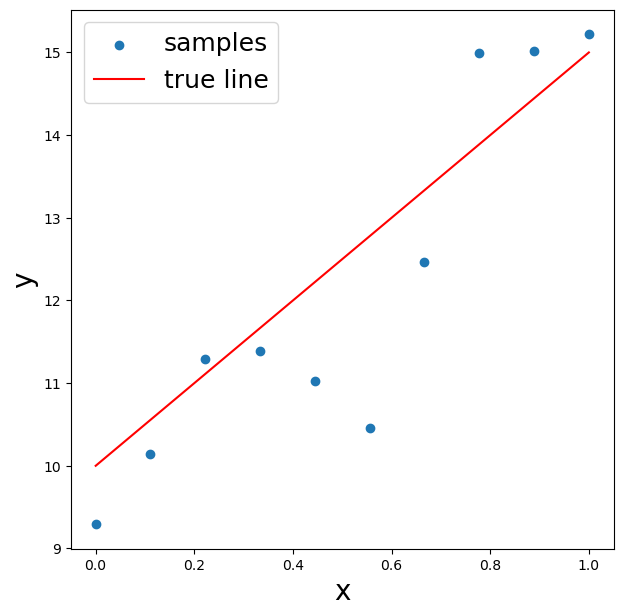

In [66]:
plt.figure(figsize=(7,7))
p1 = plt.scatter(x_vals, y_vals)
p2, = plt.plot(x_vals, true_y_vals, color='r')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.legend((p1, p2), ('samples', 'true line'), fontsize=18)

# Fit a Usual Linear Model


In [37]:
x_vals

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [38]:
x_vals.reshape(-1,1)

array([[0.        ],
       [0.11111111],
       [0.22222222],
       [0.33333333],
       [0.44444444],
       [0.55555556],
       [0.66666667],
       [0.77777778],
       [0.88888889],
       [1.        ]])

In [68]:
clf = LinearRegression()
clf.fit(x_vals.reshape(-1,1), y_vals)
preds = clf.predict(x_vals.reshape(-1,1))
resids = preds - y_vals

print('True Model:')
print('y_true = %s*x + %s'%(true_slope, true_intercept))
print('True sigma: %s\n'%true_params['sigma'])

print('Estimated Model:')
print('y_hat = %s*x + %s'%(clf.coef_[0], clf.intercept_))
print('Sd Residuals: %s'%(resids.std()))

mle_estimates = {'slope': clf.coef_[0], 'intercept': clf.intercept_, 'sigma': resids.std()}

True Model:
y_true = 5*x + 10
True sigma: 1

Estimated Model:
y_hat = 5.925660480521798*x + 9.16674007991179
Sd Residuals: 0.8787071228791571


/var/folders/sp/j3p6g91d6dj8wzlq0vy4dw8r0000gn/T/ipykernel_58954/2506388303.py:8: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend((p1, p2), ('samples', 'true line'), fontsize=18)


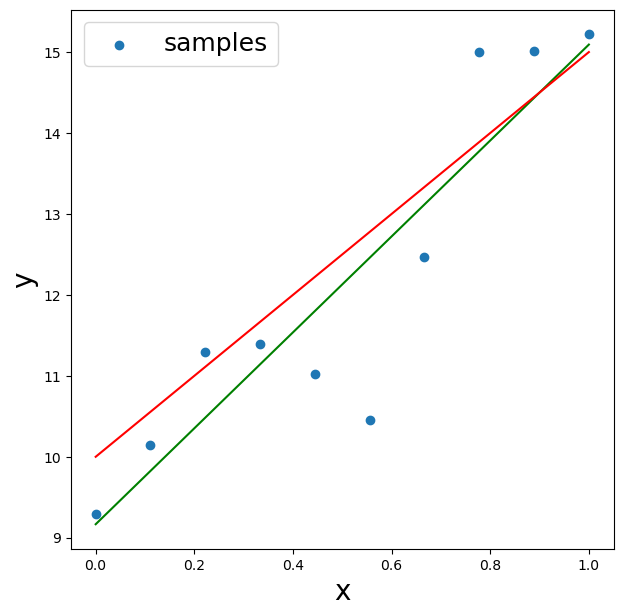

In [69]:
plt.figure(figsize=(7,7))
p1 = plt.scatter(x_vals, y_vals)
p2 = plt.plot(x_vals, clf.coef_[0]*x_vals+clf.intercept_ , color='g')
p2 = plt.plot(x_vals, true_y_vals , color='r')

plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.legend((p1, p2), ('samples', 'true line'), fontsize=18)

# Bayesian Analysis with PyMC3
***

# Priors:
## $m \sim N(0,20)$
## $b \sim N(0,20)$
## $\sigma \sim Exp(1)$
***

# Likelihood:
## $y|m,b,\sigma \sim N(mx+b, \sigma)$
***

# Posterior
## $m,b,\sigma | y \sim ?$
## $P(m,b,\sigma|y) \propto P(y|m,b,\sigma) \times P(m) \times P(b) \times P(\sigma)$
***

In [70]:
import pymc as pm


In [71]:
with pm.Model() as model:
    #priors
    #sigma = pm.Exponential("sigma", lam=1.0)
    sigma = pm.HalfNormal('sigma', sigma=10)

    intercept = pm.Normal("intercept", mu=0, sigma=20)
    slope = pm.Normal("slope", mu=0, sigma=20)

    #Likelihood
    likelihood = pm.Normal("y", mu=slope*x_vals + intercept, sigma=sigma, observed=y_vals)

    #posterior
    trace = pm.sample(1000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, intercept, slope]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.


<Figure size 700x700 with 0 Axes>

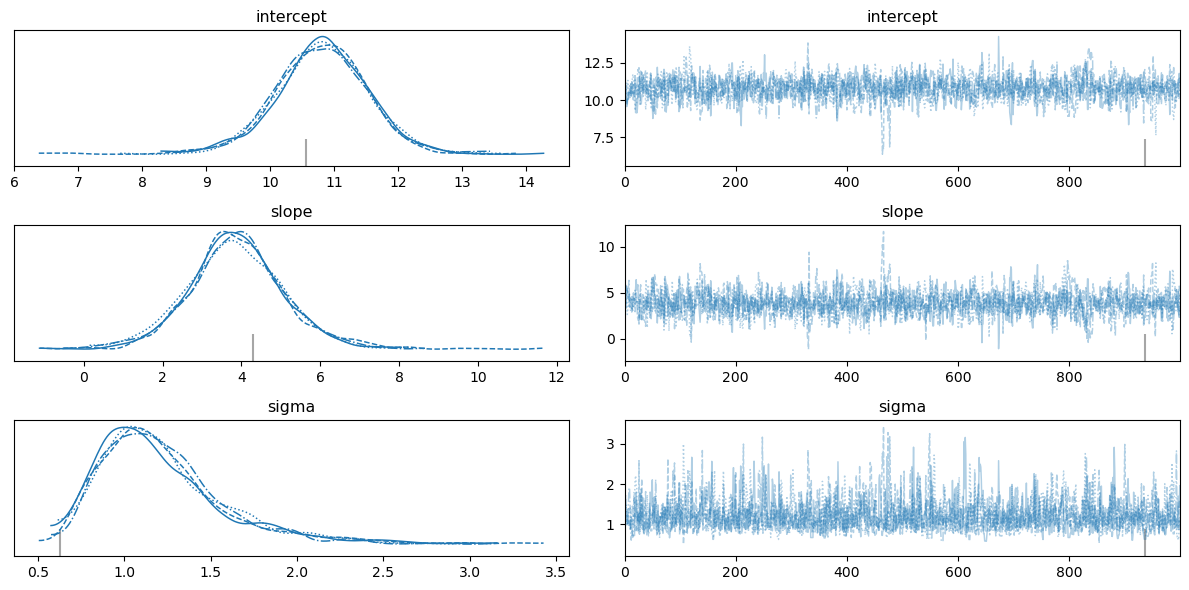

In [43]:
plt.figure(figsize=(7, 7))
pm.plot_trace(trace)
plt.tight_layout()

In [130]:
#posterior = trace.posterior.stack(sample=['slope', 'intercept', 'sigma'])

trace.keys

<bound method Mapping.keys of Inference data with groups:
	> posterior
	> sample_stats
	> observed_data>

/var/folders/sp/j3p6g91d6dj8wzlq0vy4dw8r0000gn/T/ipykernel_58954/1308268746.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vals)


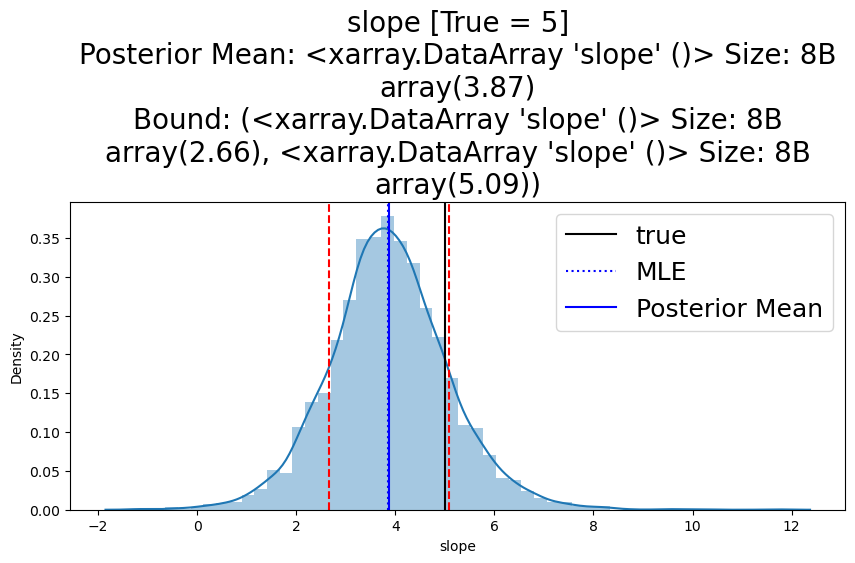

/var/folders/sp/j3p6g91d6dj8wzlq0vy4dw8r0000gn/T/ipykernel_58954/1308268746.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vals)


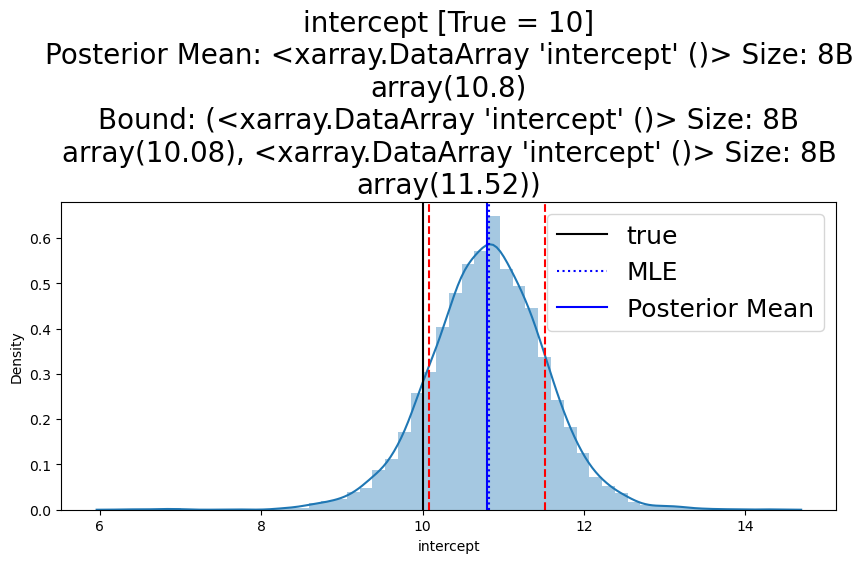

/var/folders/sp/j3p6g91d6dj8wzlq0vy4dw8r0000gn/T/ipykernel_58954/1308268746.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vals)


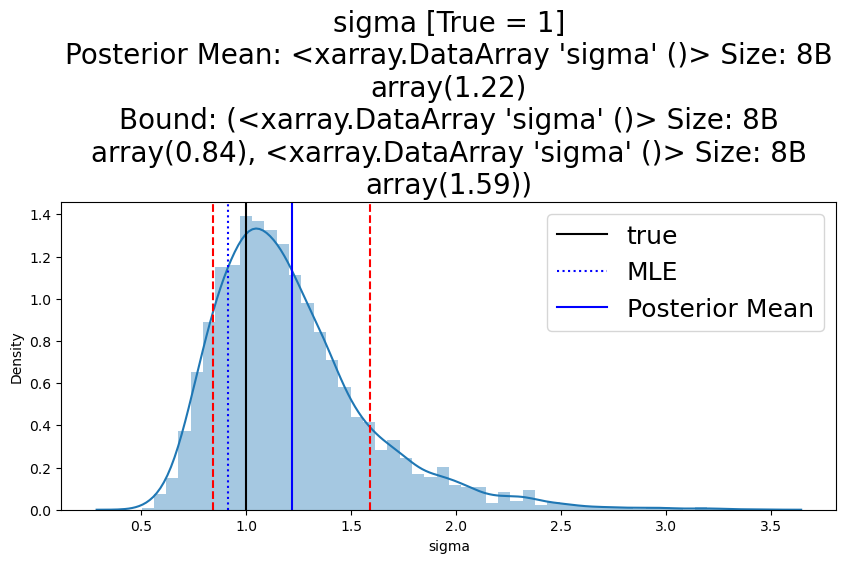

In [44]:
for var in ['slope', 'intercept', 'sigma']:
    plt.figure(figsize=(10,4))
    vals = trace['posterior'][var]
    #vals = trace.get_values(var)
    mean, lower, upper = np.round(vals.mean(),2), np.round(vals.mean()-vals.std(),2), np.round(vals.mean()+vals.std(),2)
    sns.distplot(vals)
    posterior_est = plt.axvline(mean, color='b')
    mle_est = plt.axvline(mle_estimates[var], color='b', linestyle='dotted')
    plt.axvline(lower, color='r', linestyle='--')
    plt.axvline(upper, color='r', linestyle='--')
    plt.title('%s [True = %s]\nPosterior Mean: %s\nBound: (%s, %s)'%(var,true_params[var],mean,lower,upper), fontsize=20)
    true_val = plt.axvline(true_params[var], color='k')
    
    plt.legend((true_val, mle_est, posterior_est), ('true', 'MLE', 'Posterior Mean'), fontsize=18)
    
    plt.show()

# Bayesian inference

In [1]:
from scipy import stats
import arviz as az
import matplotlib.pyplot as plt
import pymc as pm
import seaborn as sns
import pandas as pd
#from theano import shared
from sklearn import preprocessing

print('Running on PyMC v{}'.format(pm.__version__))

Running on PyMC v5.10.4


In [2]:
#https://www.kaggle.com/datasets/thegurusteam/spanish-high-speed-rail-system-ticket-pricing/versions/2?resource=download
from os.path import exists
path = "../data/renfe.csv"
if exists(path):
    data = pd.read_csv(path,parse_dates=['start_date','end_date','insert_date'])
else: 
    data = pd.read_csv("https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/data/renfe_small.csv")
    data = data.sample(frac=0.01, random_state=1)
    data.to_csv(path)
data.head()



,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,15248,2019-04-26 01:00:46,MADRID,SEVILLA,2019-05-01 15:00:00,2019-05-01 17:21:00,AVE,NaN,Preferente,Flexible
1,14882,2019-04-20 07:35:05,SEVILLA,MADRID,2019-05-01 21:00:00,2019-05-01 23:52:00,AV City,49.15,Turista,Promo
2,23985,2019-04-14 07:03:58,MADRID,VALENCIA,2019-05-21 07:40:00,2019-05-21 09:20:00,AVE,57.75,Turista,Promo
3,22378,2019-04-22 20:02:09,MADRID,SEVILLA,2019-04-25 21:25:00,2019-04-26 00:10:00,AV City,49.15,Turista,Promo
4,1901,2019-04-11 23:33:00,MADRID,VALENCIA,2019-06-04 16:05:00,2019-06-04 22:47:00,REGIONAL,28.35,Turista,Adulto ida


In [3]:
data.isnull().sum()/len(data)

Unnamed: 0     0.000000
insert_date    0.000000
origin         0.000000
destination    0.000000
start_date     0.000000
end_date       0.000000
train_type     0.000000
price          0.116279
train_class    0.003876
fare           0.003876
dtype: float64

In [4]:
type(data['train_class'].mode())

pandas.core.series.Series

In [5]:
data['train_class'].mode()[0]

'Turista'

In [6]:
data['train_class'].mode().iloc[0]


'Turista'

In [7]:
data['train_class'] = data['train_class'].fillna(data['train_class'].mode().iloc[0])
data['fare'] = data['fare'].fillna(data['fare'].mode().iloc[0])

In [8]:
data['price'] = data[['price','fare']].groupby('fare').transform(lambda x: x.fillna(x.mean()))


In [9]:
#for i in ['start_date', 'end_date']:
#    data[i] = pd.to_datetime(data[i])

In [10]:
data.shape

(258, 10)

## Gaussian inferences


<img src="../images/02/continuous.png">


The KDE plot of the ticket price shows a Gaussian-like distribution, except for about several dozens of data points that are far away from the mean.

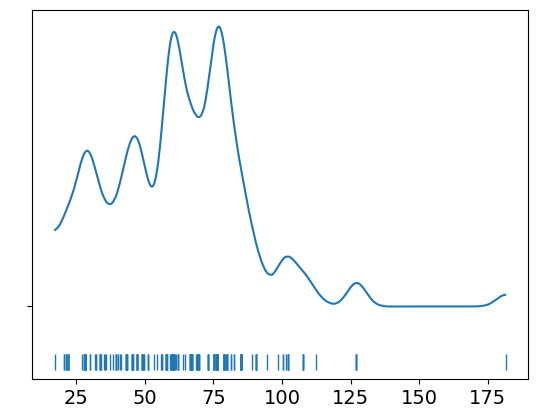

In [11]:
%matplotlib inline
# kernel density plot
az.plot_kde(data['price'].values, rug=True)
plt.yticks([0], alpha=0);
plt.show()

Let's assume that a Gaussian distribution is a proper description of the ticket price. Since we do not know the mean or the standard deviation, we must set priors for both of them. Therefore, a reasonable model could be:

### Model

We will perform Gaussian inferences on the ticket price data. Here's some of the modelling choices that go into this.

Choices for price likelihood function:

The ticket price is modelled as a linear combination of the independent variables.
We assume that the ticket price is going to be normally distributed around the linear combination of independent variables with the same variance around the expected value.

That is how we proceed below:

#### We would instantiate the Models in PyMC3 like this.

* model specifications in PyMC are wrapped in a with-statement.

Choices of priors:

* μ, mean of a population. Normal distribution. Very wide. I do not know the possible values of μ, we can set priors reflecting our ignorance. From experience I know that train ticket price can not be lower than 0 or higher than 300, so I set the boundaries of the uniform distribution to be 0 and 300. You may have different experience and set the different boundaries. That is totally fine. And if you have more reliable prior information than I do, please use it!

* σ, standard deviation of a population. Can only be positive, therefore use HalfNormal distribution, again, very wide.

Choices for ticket price likelihood function:

* y is an observed variable representing the data that comes from a Normal distribution with the parameters μ and σ.

* draw 1000 posterior samples using NUTS sampling
 
Using PyMC3, we can write the model as follows:

----
Running MCMC: on sampling from the prior distribution, evaluate the likelihood of the sampled parameter, then (in the next cell) plot, what is the likelihood of a given sampled parameter.
https://stackoverflow.com/questions/49825216/what-is-a-chain-in-pymc3

In [12]:
with pm.Model() as model_g:
    μ = pm.Uniform('μ', lower=0, upper=300)
    σ = pm.HalfNormal('σ', sigma=10)
    y = pm.Normal('y', mu=μ, sigma=σ, observed=data['price'].values)
    trace_g = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


The "y" specifies the likelihood. This is the way in which we tell PyMC3 that we want to condition for the unknown on the knows (data). The observed values can be passed as a Python list, a tuple, a NumPy array, or a pandas DataFrame.

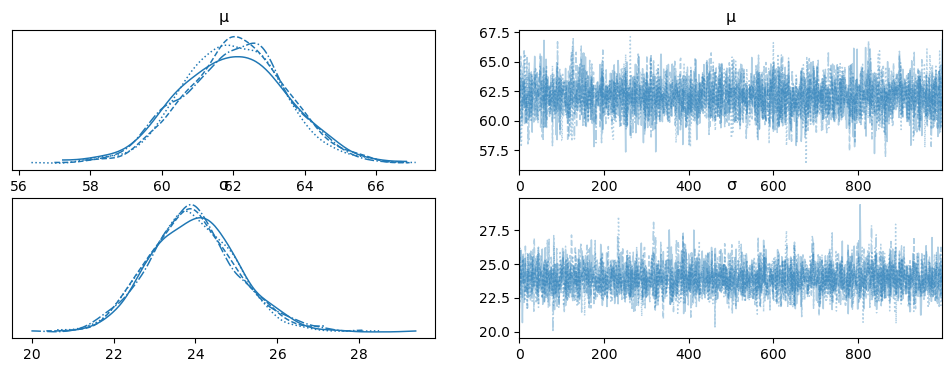

In [13]:
az.plot_trace(trace_g);

On the left, we have a KDE plot, – for each parameter value on the x-axis we get a probability on the y-axis that tells us how likely that parameter value is.

On the right, we get the individual sampled values at each step during the sampling. From the trace plot, we can visually get the plausible values from the posterior.

The above plot has one row for each parameter. For this model, the posterior is bi-dimensional, and so the above figure is showing the marginal distributions of each parameter.

There are a couple of things to see here. 

* Our sampling chains for the individual parameters (left side) seem well converged and stationary (there are no large drifts or other odd patterns).

* The maximum posterior estimate of each variable (the peak in the left side distributions) is very close to the true parameters.

We can plot a joint distributions of parameters. I don't see any correlation between these two parameters. This means we probably do not have collinearity in the model. This is good.

/Users/peterkiss/anaconda3/envs/ml-labs-1/lib/python3.9/site-packages/arviz/plots/pairplot.py:232: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  gridsize = int(dataset.dims["draw"] ** 0.35)


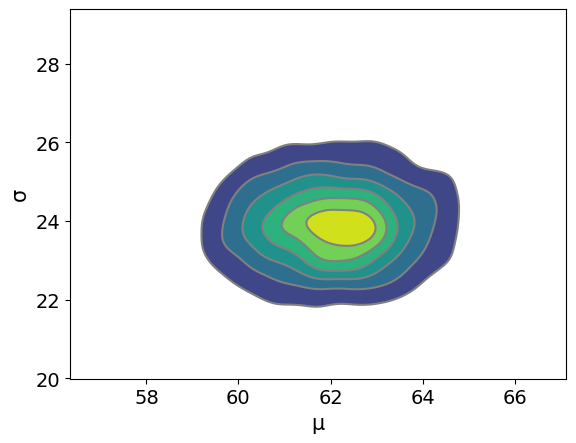

In [14]:
az.plot_pair(trace_g, kind='kde');

We can also have a detailed summary of the posterior distribution for each parameter:

In [185]:
az.summary(trace_g)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ,62.023,1.510,59.109,64.771,0.024,0.017,4058.0,2901.0,1.0
σ,23.900,1.056,21.961,25.898,0.017,0.012,4003.0,2720.0,1.0



https://python.arviz.org/en/stable/api/generated/arviz.summary.html

HDI: Highest Density Interval - All points within this interval have a higher probability density than points outside the interval. 

hdi_3% and hdi_97%
one representing the left end of the interval (the value below which 3% of the posterior falls) and one representing the right end of the interval (the value above which 3% of the posterior falls)

----

We can also see the above summary visually by generating a plot with the mean and HPD of a distribution.

We get the mean, standard deviation (sd), and 94% HPD interval (hpd 3% and hpd 97%). we can use these numbers to interpret and report the results of a Bayesian inference.

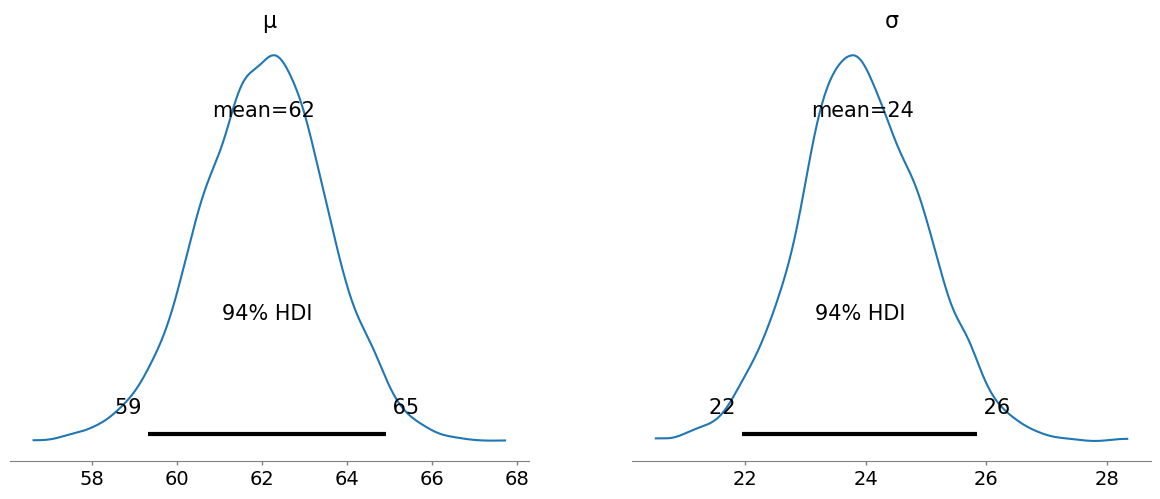

In [76]:
az.plot_posterior(trace_g);

Unlike Frequentist statistics, in Bayesian statistics, we get the entire distribution of the values.

Every time ArviZ computes and reports a HPD, it will use, by default, a value of 94%. please note that HPD intervals are not the same as confidence intervals. There is 94% probability the belief is between 63.8 and 64.4 for the mean ticket price.

We can verify the convergence of the chains formally using the Gelman Rubin test. Values close to 1.0 mean convergence.

----
(tests for lack of convergence by comparing the variance between multiple chains to the variance within each chain. If convergence has been achieved, the between-chain and within-chain variances should be identical. - https://python.arviz.org/en/stable/api/generated/arviz.rhat.html)

Gelman Rubin: https://stats.stackexchange.com/questions/99375/gelman-and-rubin-convergence-diagnostic-how-to-generalise-to-work-with-vectors

In [43]:
#pm.gelman_rubin(trace_g)
az.rhat(trace_g)

<xarray.Dataset> Size: 16B
Dimensions:  ()
Data variables:
    μ        float64 8B 1.0
    σ        float64 8B 1.001

Bayesian fraction of missing information (BFMI)

In [77]:
bfmi = pm.bfmi(trace_g)
max_gr = max(np.max(gr_stats) for gr_stats in az.rhat(trace_g).values())

Eneryplot

https://discourse.pymc.io/t/about-nuts-sampling-and-energy-plot/831
[Explanation YouTube](https://www.youtube.com/watch?v=VnNdhsm0rJQ)


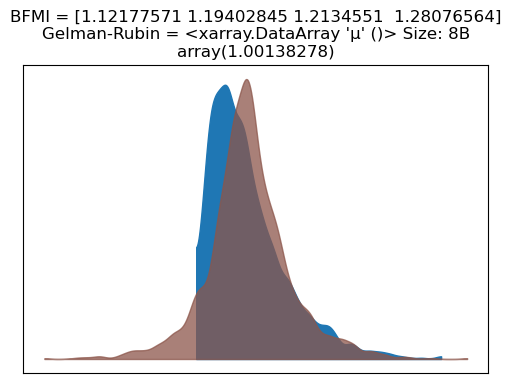

In [95]:
(pm.plot_energy(trace_g, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr)));

Our model has converged well and the Gelman-Rubin statistic looks good.

### Posterior Predictive Checks

Posterior predictive checks (PPCs) are a great way to validate a model. The idea is to generate data from the model using parameters from draws from the posterior.

Now that we have computed the posterior, we are going to illustrate how to use the simulation results to derive predictions.

The following function will randomly draw 1000 samples of parameters from the trace. Then, for each sample, it will draw 25798 random numbers from a normal distribution specified by the values of μ and σ in that sample.

In [96]:
with model_g:
    ppc = pm.sample_posterior_predictive(trace_g, predictions=True)
#ppc = pm.sample_posterior_predictive(trace_g, model=model_g)


Sampling: [y]


In [97]:
ppc

Inference data with groups:
	> predictions

In [98]:
ppc.keys

<bound method Mapping.keys of Inference data with groups:
	> predictions>

In [100]:
np.asarray(ppc['predictions']['y']).shape

(4, 1000, 258)

Now, ppc contains 1000 generated data sets (containing 25798 samples each), each using a different parameter setting from the posterior.

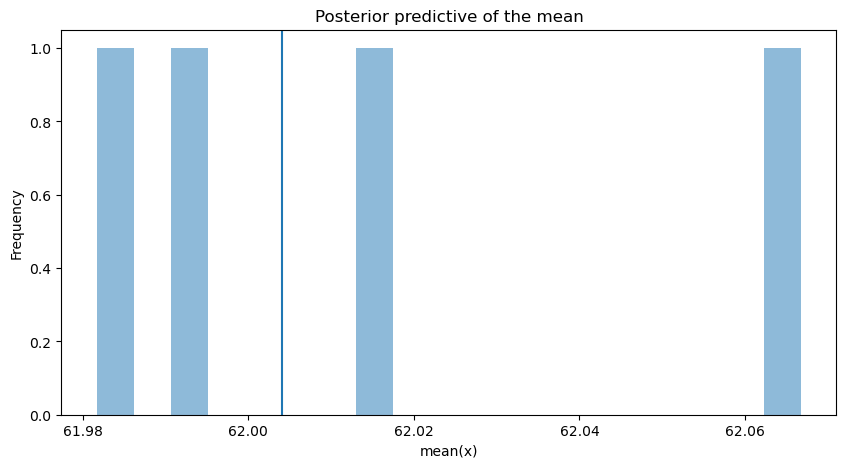

In [102]:
_, ax = plt.subplots(figsize=(10, 5))
ax.hist([y.mean() for y in ppc['predictions']['y']], bins=19, alpha=0.5)
ax.axvline(data.price.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

The inferred mean is very close to the actual ticket price mean.

### Group Comparison

We may be interested in how price compare under different fare types. we are going to focus on estimating the effect size, that is, quantifying the difference between two fare types. To compare fare types, we are going to use the mean of each fare type. Because we are Bayesian, we will work to obtain a posterior distribution of the differences of means between fare types.

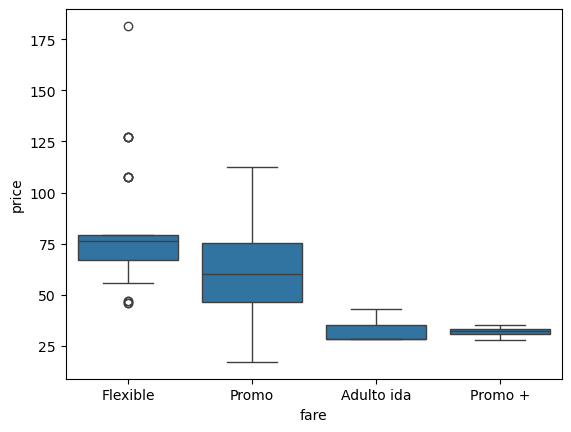

In [186]:
sns.boxplot(x='fare', y='price', data=data);

In [187]:
data.fare.unique()

array(['Flexible', 'Promo', 'Adulto ida', 'Promo +'], dtype=object)

We create three variables: the price variable, representing the ticket price, the idx variable, a categorical dummy variable to encode the fare types with numbers, and finally the groups variable, with the number of fare types (6):

### Estimate model parameters per group (fare type)

In [188]:
price = data['price'].values
idx = pd.Categorical(data['fare'],
                     categories=['Flexible', 'Promo', 'Promo +', 'Adulto ida', 'Mesa', 'Individual-Flexible']).codes
groups = len(np.unique(idx))

The model for the group comparison problem is almost the same as the previous model. the only difference is that μ and σ are going to be vectors instead of scalar variables. This means that for the priors, we pass a shape argument and for the likelihood, we properly index the means and sds variables using the idx variable:

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 5_000 tune and 5_000 draw iterations (20_000 + 20_000 draws total) took 45 seconds.
There were 350 divergences after tuning. Increase `target_accept` or reparameterize.


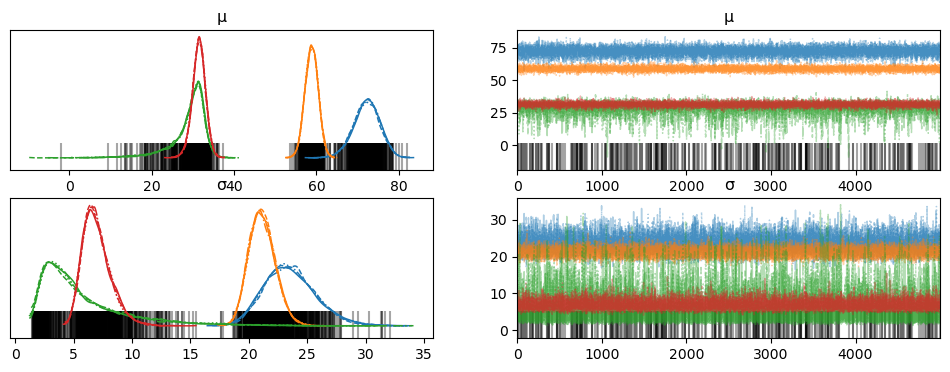

In [189]:
with pm.Model() as comparing_groups:
    μ = pm.Normal('μ', mu=0, sigma=10, shape=groups)
    σ = pm.HalfNormal('σ', sigma=10, shape=groups)

    y = pm.Normal('y', mu=μ[idx], sigma=σ[idx], observed=price)

    trace_groups = pm.sample(5000, tune=5000)
az.plot_trace(trace_groups);

This time, we get a KDE plot of μ and σ for every group (i.e. fare type).

In [190]:
flat_fares = az.from_pymc3(trace=trace_groups)
fares_gaussian = az.summary(flat_fares)
fares_gaussian

AttributeError: module 'arviz' has no attribute 'from_pymc3'

It is obvious that there are significant differnces between groups (i.e. fare types) on mean. 

To make it more visual, We plot the difference without between each fare type without repeating the comparison.

* Cohen's d is an appropriate effect size for the comparison between two means. Cohen's d introduces the variability of each group by using their standard deviations.

* probability of superiority (ps) is defined as the probability that a data point taken at random from one group has a larger value than one taken at random from another group.

In [ ]:
dist = stats.norm()

_, ax = plt.subplots(5, 2, figsize=(20, 12), constrained_layout=True)

comparisons = [(i, j) for i in range(6) for j in range(i+1, 6)]
pos = [(k, l) for k in range(5) for l in (0, 1)]

for (i, j), (k, l) in zip(comparisons, pos):
    means_diff = trace_groups['μ'][:, i] - trace_groups['μ'][:, j]
    d_cohen = (means_diff / np.sqrt((trace_groups['σ'][:, i]**2 + trace_groups['σ'][:, j]**2) / 2)).mean()
    ps = dist.cdf(d_cohen/(2**0.5))
    az.plot_posterior(means_diff, ref_val=0, ax=ax[k, l])
    ax[k, l].set_title(f'$\mu_{i}-\mu_{j}$')
    ax[k, l].plot(
        0, label=f"Cohen's d = {d_cohen:.2f}\nProb sup = {ps:.2f}", alpha=0)
    ax[k, l].legend();

Basically, the above plot tells us that none of the above comparion cases where the 94% HPD includes the reference value of zero. This means for all the examples, we can rule out a difference of zero. The average differences range of 6.1 euro to 63.5 euro are large enough that it can justify for customers to purchase tickets according to different fare types.

### Bayesian Hierarchical Linear Regression

In [46]:
def replace_fare(fare):
    
    if fare == 'Adulto ida':
        return 1
    elif fare == 'Promo +':
        return 2
    elif fare == 'Promo':
        return 3
    elif fare == 'Flexible':
        return 4
    elif fare == 'Individual-Flexible':
        return 5
    elif fare == 'Mesa':
        return 6

data['fare_encode'] = data['fare'].apply(lambda x: replace_fare(x))

In [47]:
label_encoder = preprocessing.LabelEncoder() 
data['train_type_encode']= label_encoder.fit_transform(data['train_type'])

In [48]:
train_type_names = data.train_type.unique()
train_type_idx = data.train_type_encode.values

n_train_types = len(data.train_type.unique())

In [49]:
data[['train_type', 'price', 'fare_encode']].head()

,train_type,price,fare_encode
0,AVE,79.014286,4
1,AV City,49.150000,3
2,AVE,57.750000,3
3,AV City,49.150000,3
4,REGIONAL,28.350000,1


In [60]:
n_train_types

15

 We are interested in whether different train type affect the ticket price.

In [53]:
with pm.Model() as hierarchical_model:
    # global model parameters
    α_μ_tmp = pm.Normal('α_μ_tmp', mu=0., sigma=100)
    α_σ_tmp = pm.HalfNormal('α_σ_tmp', 5.)
    β_μ = pm.Normal('β_μ', mu=0., sigma=100)
    β_σ = pm.HalfNormal('β_σ', 5.)

    # train type specific model parameters
    α_tmp = pm.Normal('α_tmp', mu=α_μ_tmp, sigma=α_σ_tmp, shape=n_train_types)  
    # Intercept for each train type, distributed around train type mean 
    β = pm.Normal('β', mu=β_μ, sigma=β_σ, shape=n_train_types)
    # Model error
    eps = pm.HalfCauchy('eps', 5.)

    fare_est = α_tmp[train_type_idx] + β[train_type_idx]*data.fare_encode.values

    # Data likelihood
    fare_like = pm.Normal('fare_like', mu=fare_est, sigma=eps, observed=data.price)

In [54]:
with hierarchical_model:
    hierarchical_trace = pm.sample(2000, tune=2000, target_accept=.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α_μ_tmp, α_σ_tmp, β_μ, β_σ, α_tmp, β, eps]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 102 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 1022 divergences after tuning. Increase `target_accept` or reparameterize.


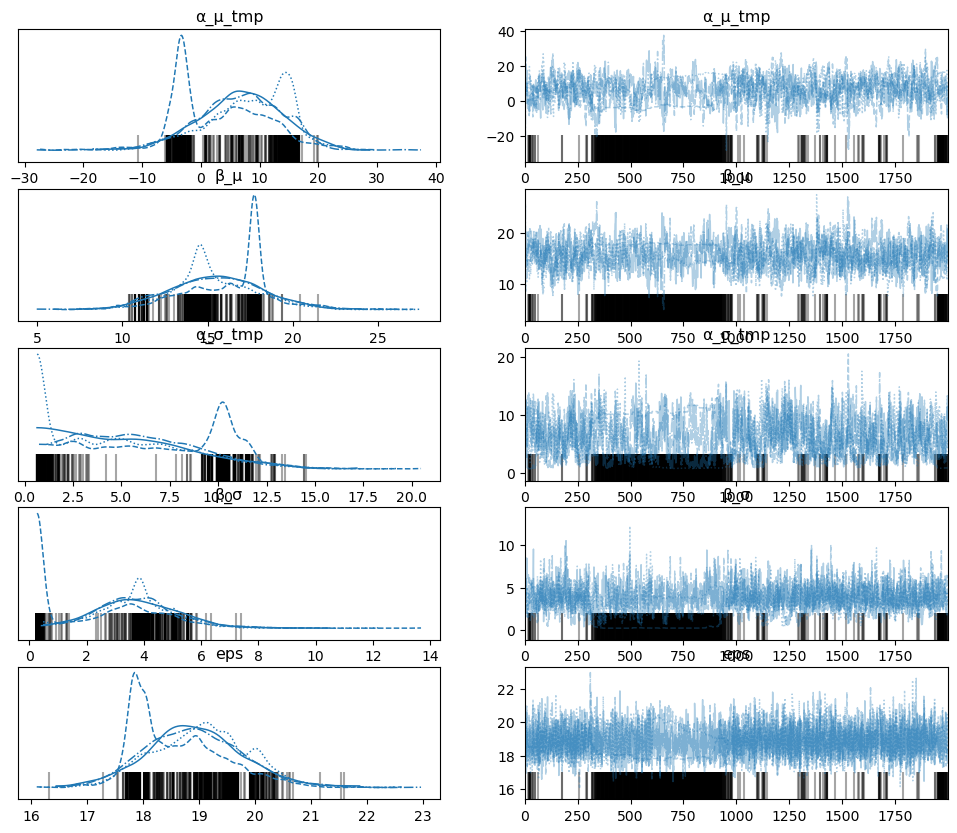

In [56]:
pm.plot_trace(hierarchical_trace, var_names=['α_μ_tmp', 'β_μ', 'α_σ_tmp', 'β_σ', 'eps']);

The marginal posteriors in the left column are highly informative, "α_μ_tmp" tells us the group mean price levels, "β_μ" tells us that purchasing fare type "Promo +" increases price significantly compare to fare type "Adulto ida", and purchasing fare type "Promo" increases price significantly compare to fare type "Promo +", and so on (no mass under zero).

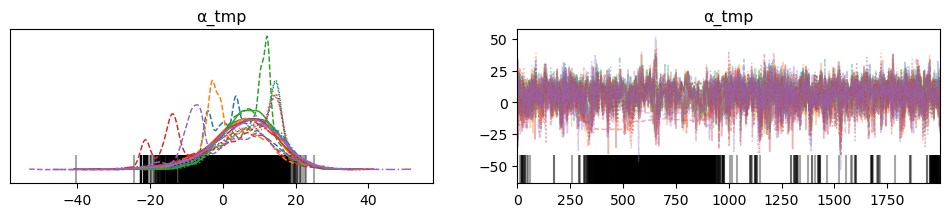

In [57]:
pm.plot_trace(hierarchical_trace, var_names=['α_tmp'], coords={'α_tmp_dim_0': range(5)});

We can also see by looking at the marginals for "α_tmp" that there is quite some differences in prices between train types; the different widths are related to how much confidence we have in each paramter estimate – the more measurements per train type, the higher our confidence will be.

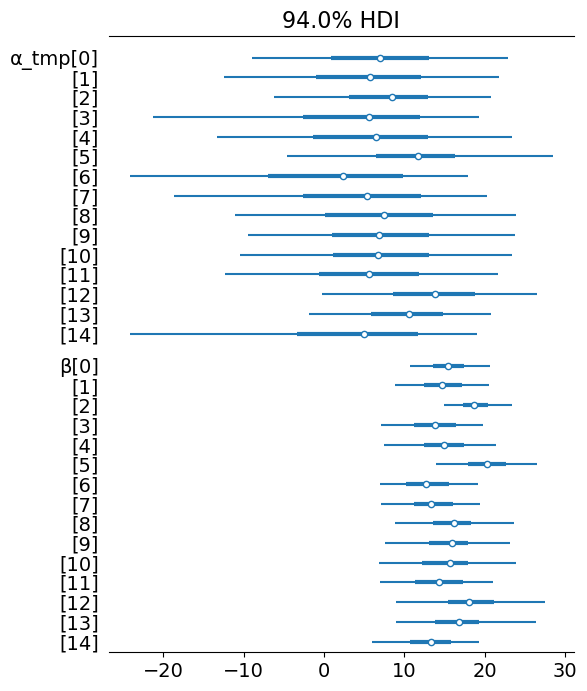

In [58]:
az.plot_forest(hierarchical_trace, var_names=['α_tmp', 'β'], combined=True);

In [70]:
ppc = pm.sample_posterior_predictive(hierarchical_trace, samples=2000, model=hierarchical_model)
az.r2_score(data.price.values, ppc['fare_like'])

AttributeError: module 'arviz' has no attribute 'sample_posterior_predictive'